# Étape 1: Chargement des bibliothèques

In [14]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import IsolationForest

from sklearn.datasets import load_digits

In [15]:
dataset = load_digits()
#print(dataset)

# Étape 2 et 3: Génération d'un ensemble d'entraînement et de test avec des observations normales


In [18]:
random_seed = np.random.RandomState(12)
# Générer un ensemble d'observations normales à utiliser comme données d'entraînement
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])
# Générer un ensemble de test, également composé d'observations normales
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

# Étape 4: Génération de valeurs aberrantes pour l'ensemble de test

In [19]:
# Générer un ensemble d'observations anormales. Ces observations sont générées à partir d'une distribution différente de celle des observations normales
X_outliers = random_seed.uniform (-5, 5, (50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

# Étape 5: Traçage des données

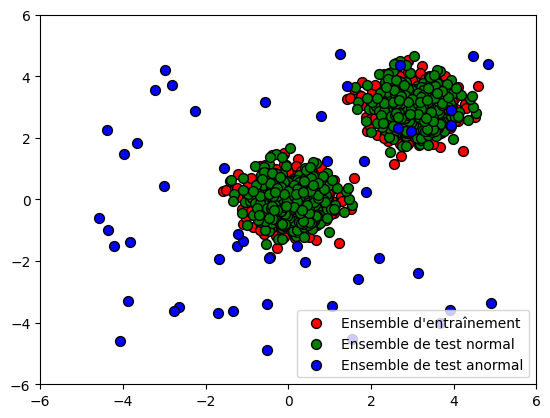

In [30]:
# Visualiser les données générées 
p1 = plt.scatter(X_train.x, X_train.y, c="red", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black"),
plt.xlim((-6, 6))
plt.ylim((-6, 6)) 
plt.legend([p1, p2, p3], ["Ensemble d'entraînement", "Ensemble de test normal", "Ensemble de test anormal"], loc="lower right")
plt.show()

# Étape 6: Ajustement de l'Isolation Forest aux données d'entraînement

In [23]:
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_train)

IsolationForest(random_state=42)

# Étape 7: Prédiction des étiquettes pour les données aberrantes

In [28]:
outlier_labels = isolation_forest.predict(X_outliers)
print("Étiquettes prédites pour les données aberrantes :", outlier_labels)

Étiquettes prédites pour les données aberrantes : [-1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1]


# Étape 8: Traçage des prédictions de l'instance d'Isolation Forest sur les valeurs aberrantes

In [31]:
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=outlier_labels, cmap='viridis')
plt.scatter(
    X_outliers.x
)
plt.title('Prédictions de l\'Isolation Forest sur les valeurs aberrantes')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.colorbar(label='Étiquettes prédites')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

# Étape 9: Ajout des étiquettes prédites à X_test

In [ ]:
test_labels = isolation_forest.predict(X_test)

# Étape 10: Traçage des prédictions de l'instance d'Isolation Forest sur les données de test normales

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap='viridis')
plt.title('Prédictions de l\'Isolation Forest sur les données de test normales')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Étiquettes prédites')
plt.show()